![.](.\6-step-ml-framework.png)

# 1. Problem definition

Can we predict the math final grade, based on social, gender and study information about students ?

# 2. Data

Could you get the data from Kaggle. The data is about social, gender and study data from secondary school students. 
[Download the original dataset](https://www.kaggle.com/uciml/student-alcohol-consumption)

# 3. Evaluation

This is a regression problem, because we wanna predict a number, wich is a final grade (0 to 20). For the evaluation we gonna use r2 score, mean absolute error and root mean squared error metrics. The succesfull gonna be determinate for a least 85 percent in the r2 score and a +- 2 in the other metrics. 

# 4. Features

Atributes for Math students:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - 1 hour)
14. studytime - weekly study time (numeric: 1 - 10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math:

31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

### EXPLORATORY DATA ANALYSIS

In [3]:
#Let´s import the necessary libraries for EDA
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Store the data in our system for analysis
df = pd.read_csv('.\Data\student-mat.csv')
df.shape

(395, 33)

**The data looks like:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


**Missing values**

In [10]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No missing values in the df

**How look the target?**

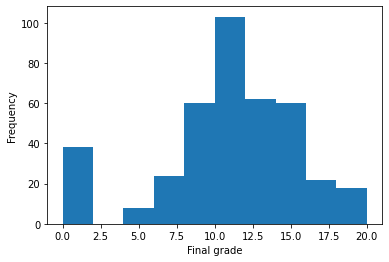

In [18]:
df.G3.plot.hist()
plt.xlabel('Final grade');

In [14]:
df.G3.value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

The final grade wants to follow a normal distribution

In [33]:
def plot_bar(features_list):
    for column in features_list:
        fig, ax = plt.subplots()
        ax = df[column].value_counts().plot.bar()
        ax.set(title=f'{column}');

In [59]:
#get all objects
object_list = []
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        object_list.append(label)

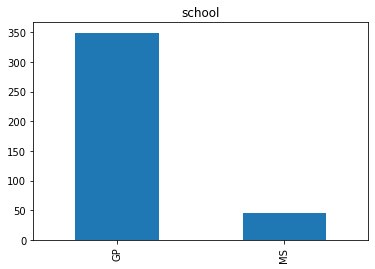

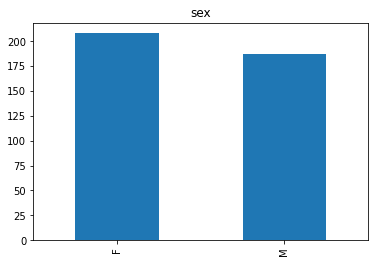

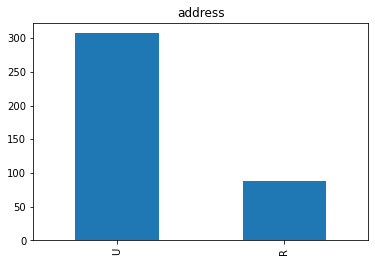

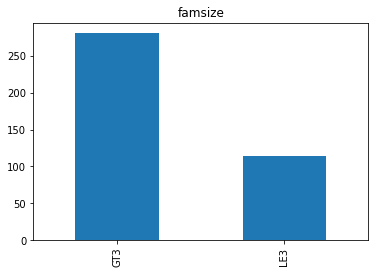

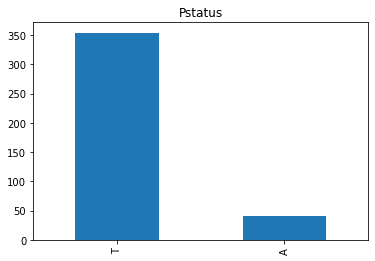

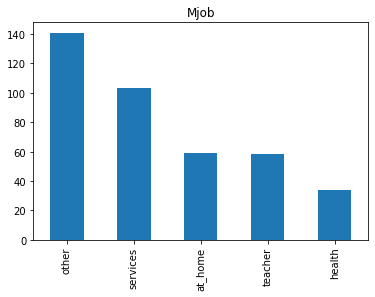

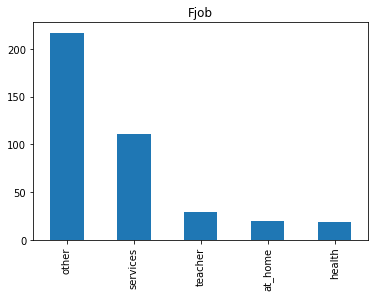

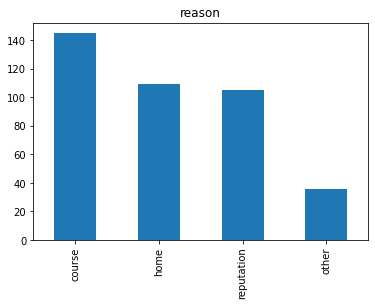

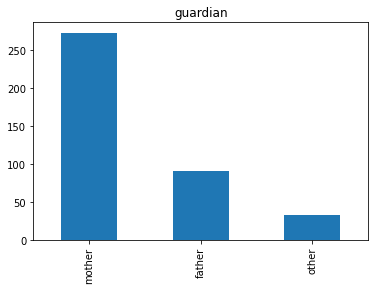

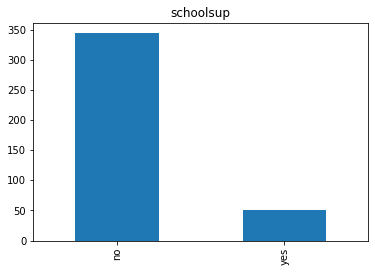

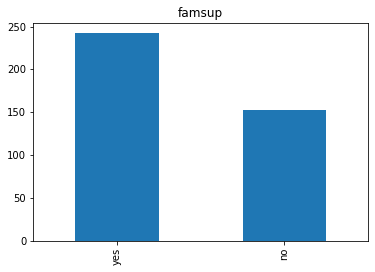

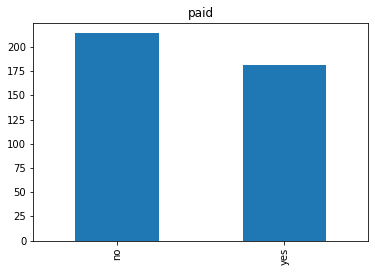

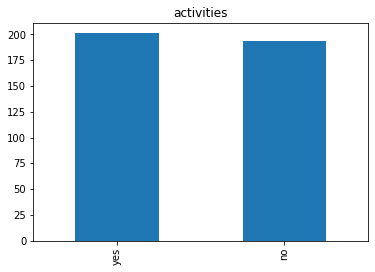

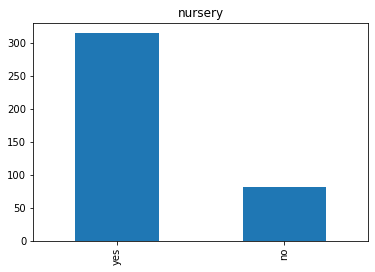

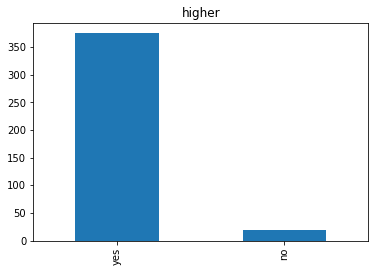

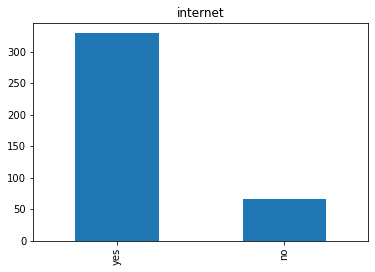

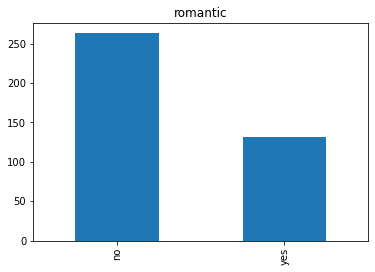

In [34]:
plot_bar(object_list)

Most of the student on the df studies in Gabriel Pereira school, live in a urban address, their families have more than 3 members. The mayor have ther fathers living together. 

**IF YOU WANT TO KNOW MORE ABOUT THE STUDENT REVIEW THE ABOVE AND NEXT CHARTS BOXES**

In [36]:
def plot_hist(features_list):
    for column in features_list:
        fig, ax = plt.subplots()
        ax = df[column].plot.hist()
        ax.set(title=f'{column}');

In [56]:
#get all numerics
numeric_list = []
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric_list.append(label)

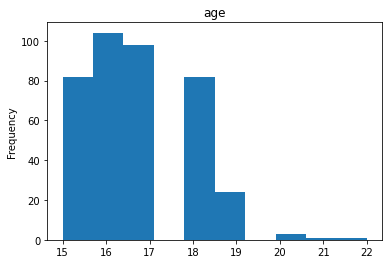

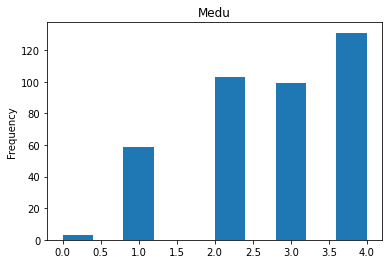

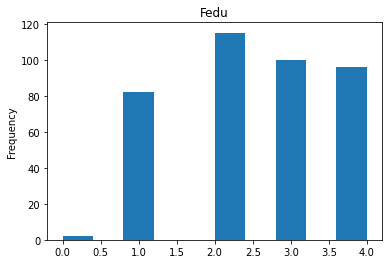

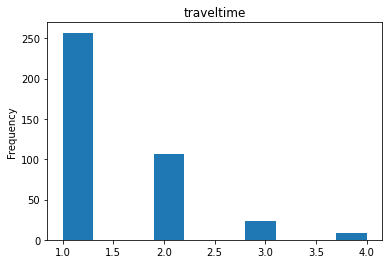

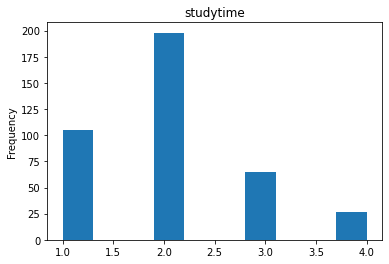

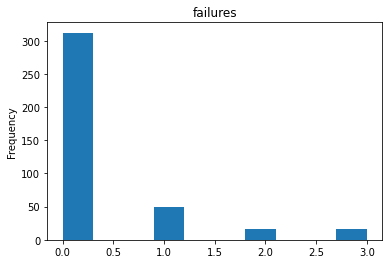

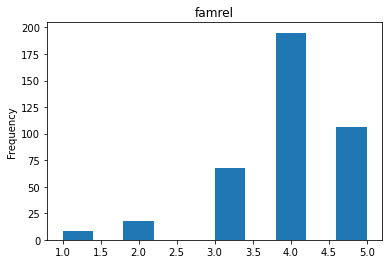

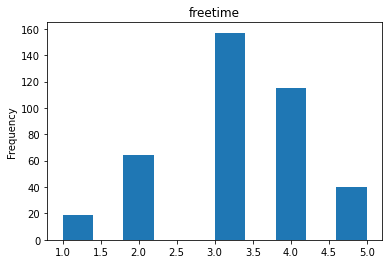

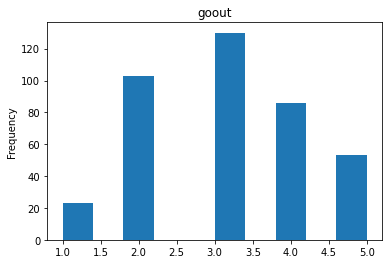

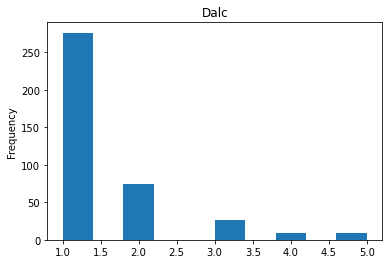

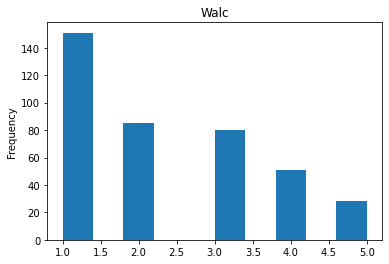

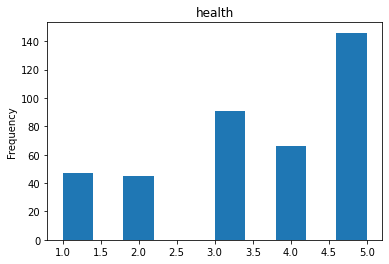

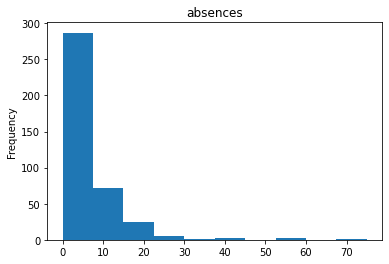

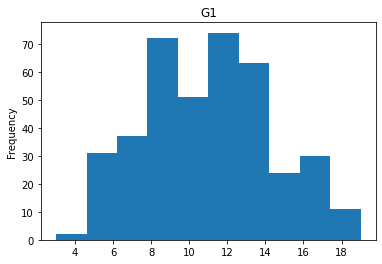

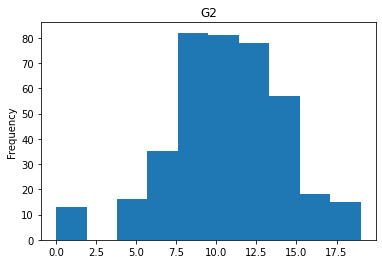

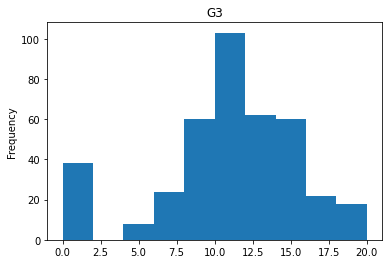

In [57]:
plot_hist(numeric_list)

# 5. Modelling

**Getting the data ready**

In [60]:
#We have to convert the objects features to cat features
len(object_list)

17

In [62]:
for label in object_list:
    df[label] = df[label].astype('category').cat.as_ordered()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [115]:
#convert all categorical variables into numbers 
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes

In [116]:
#save the preprocessing df
df.to_csv('.\Data\df.preprocessing.csv', index=False)

In [5]:
df_2 = pd.read_csv('.\Data\df.preprocessing.csv')
df_2.shape

(395, 33)

In [118]:
df_2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [119]:
df_2 = df.copy()

In [6]:
#split data into x and y
x = df_2.drop('G3', axis=1)
y = df_2['G3']

In [121]:
x.shape, y.shape

((395, 32), (395,))

In [7]:
#Split data into train and test

#seed
np.random.seed(5)

#importing neccesary tools
from sklearn.model_selection import train_test_split

#Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Check
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((316, 32), (79, 32), (316,), (79,))

**Choosing the rigth model for you data**

We will be looking at following Algorithms

Improved Linear regression models

1. Ridge regression

2. Lasso regression

Support Vector Machine

3. Support vector regression

Nearest neighbour Regressor

4. KNeighborsRegressor

Ensmble models

5. Random Forest Regressor

6. Gradient Boosting Regressor

7. ExtraTrees Regressor

Neural Network

8. Multi Layer Preceptron Regressor

In [8]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

In [124]:
models = [
    ['Ridge: ', Ridge()],
    ['Lasso: ', Lasso()],
    ['SVR: ', SVR()],
    ['KNeighborsRegressor: ', KNeighborsRegressor()],
    ['RandoForestRegressor: ', RandomForestRegressor()],
    ['GradientBoostingRegressor: ', GradientBoostingRegressor()],
    ['ExtraTreesRegressor: ', ExtraTreesRegressor()],
    ['MLPRegressor: ', MLPRegressor(activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
]

**Fitting the models to the data a get a previously score**

In [127]:
#To get the fit time
import time
#Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Make a list to save the first pack of results
first_score = []

#For fit each model in the data
for name, model in models:
    model_pack = {}
    model.random_state = 5
    model_pack['Name'] = name
    start = time.time()
    model.fit(x_train, y_train)
    end = time.time()
    model_pack['Train time'] = end - start
    model_pack['Train R2 score'] = r2_score(y_train, model.predict(x_train))
    model_pack['Test R2 score'] = r2_score(y_test, model.predict(x_test))
    model_pack['Test MAE'] = mean_absolute_error(y_test, model.predict(x_test))
    model_pack['Test RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    first_score.append(model_pack)    

In [128]:
first_score

[{'Name': 'Ridge: ',
  'Train time': 0.0039861202239990234,
  'Train R2 score': 0.8719339367330323,
  'Test R2 score': 0.7074190061880523,
  'Test MAE': 1.5729615678177853,
  'Test RMSE': 2.468943010040491},
 {'Name': 'Lasso: ',
  'Train time': 0.32705235481262207,
  'Train R2 score': 0.8448676558879741,
  'Test R2 score': 0.7083242685273256,
  'Test MAE': 1.3426916038915355,
  'Test RMSE': 2.465120525518018},
 {'Name': 'SVR: ',
  'Train time': 0.024976491928100586,
  'Train R2 score': 0.8330386141097559,
  'Test R2 score': 0.6983705540756471,
  'Test MAE': 1.4486482410254122,
  'Test RMSE': 2.5068299696383076},
 {'Name': 'KNeighborsRegressor: ',
  'Train time': 0.011968612670898438,
  'Train R2 score': 0.9067992038591037,
  'Test R2 score': 0.7912872810053374,
  'Test MAE': 1.4734177215189872,
  'Test RMSE': 2.085270829024313},
 {'Name': 'RandoForestRegressor: ',
  'Train time': 0.23755884170532227,
  'Train R2 score': 0.9876065779133996,
  'Test R2 score': 0.8361494578007475,
  'Test

**Evaluating a ML-model**

In [130]:
df_score_1 = pd.DataFrame(first_score)
df_score_1

,Name,Train time,Train R2 score,Test R2 score,Test MAE,Test RMSE
0,Ridge:,0.003986,0.871934,0.707419,1.572962,2.468943
1,Lasso:,0.327052,0.844868,0.708324,1.342692,2.465121
2,SVR:,0.024976,0.833039,0.698371,1.448648,2.506830
3,KNeighborsRegressor:,0.011969,0.906799,0.791287,1.473418,2.085271
4,RandoForestRegressor:,0.237559,0.987607,0.836149,1.266076,1.847617
5,GradientBoostingRegressor:,0.081288,0.977807,0.841880,1.267995,1.815018
6,ExtraTreesRegressor:,0.231341,1.000000,0.792211,1.357468,2.080651
7,MLPRegressor:,0.572468,0.949716,0.759299,1.490577,2.239374


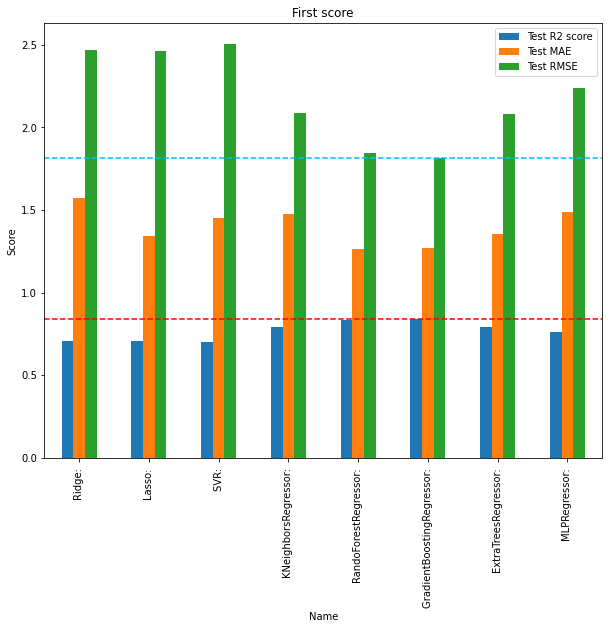

In [142]:
fig, ax = plt.subplots(figsize= (10,8))
df_score_1.plot.bar(x='Name', y=['Test R2 score', 'Test MAE', 'Test RMSE'], ax=ax)
ax.set(title='First score', ylabel='Score')
ax.axhline(df_score_1['Test R2 score'].max(), linestyle='--', c='red')
ax.axhline(df_score_1['Test RMSE'].min(), linestyle='--', c='deepskyblue');

* Best results over test set are given by RandoForestRegressor and GradientBoostingRegressor

**Improving each models**

In [143]:
#For improving our models
from sklearn.model_selection import GridSearchCV

#We just gonna improve the models who have a r2_score at least of 0.8

In [151]:
#RandomForestRegresso parameters
rfr_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'auto'],
}

rfr_model = RandomForestRegressor(random_state= 5)

#GradientBoostingRegressor parameters
gbr_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'auto'],
}

gbr_model = GradientBoostingRegressor(random_state= 5)

In [152]:
rfr_model_gs = GridSearchCV(estimator=rfr_model, 
                            param_grid=rfr_grid, 
                            cv=5,
                            verbose=2,
                            n_jobs=-1)

gbr_model_gs = GridSearchCV(estimator=gbr_model, 
                            param_grid=gbr_grid, 
                            cv=5,
                            verbose=2,
                            n_jobs=-1)

In [153]:
#fit the data with RandomForestRegressor new parameters
rfr_model_gs.fit(x_train, y_train)

Fitting 5 folds for each of 12960 candidates, totalling 64800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1626 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2516 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3570 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4784 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 6162 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7700 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 9402 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 11264 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 13290 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 15476 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 17826 tasks    

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=5), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'max_features': [0.5, 1, 'sqrt', 'auto'],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             verbose=2)

In [154]:
#fit the data with GradientBoostingRegressor new parameters
gbr_model_gs.fit(x_train, y_train)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 5760 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7868 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 10296 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 13052 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 16128 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 16200 out of 16200 | elapsed:  3.1min finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=5),
             n_jobs=-1,
             param_grid={'max_features': [0.5, 1, 'sqrt', 'auto'],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             verbose=2)

In [156]:
rfr_model_gs.best_params_

{'max_depth': 10,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 90}

In [157]:
gbr_model_gs.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 40}

In [159]:
models_2 = [
    ['RandomForestRegressor:', rfr_model_gs], 
    ['GradientBoostingRegressor', gbr_model_gs]
]

In [168]:
#Make a list to save the last pack of results
last_score = []

#Score
for name, model in models_2:
    model_pack_2 = {}
    model_pack_2['Name'] = name
    model_pack_2['Train R2 score'] = r2_score(y_train, model.predict(x_train))
    model_pack_2['Test R2 score'] = r2_score(y_test, model.predict(x_test))
    model_pack_2['Test MAE'] = mean_absolute_error(y_test, model.predict(x_test))
    model_pack_2['Test RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    last_score.append(model_pack_2)

In [169]:
last_score

[{'Name': 'RandomForestRegressor:',
  'Train R2 score': 0.9724555141919546,
  'Test R2 score': 0.8287032709266615,
  'Test MAE': 1.266094064056504,
  'Test RMSE': 1.8891330459224591},
 {'Name': 'GradientBoostingRegressor',
  'Train R2 score': 0.9411781490816816,
  'Test R2 score': 0.8268021858183131,
  'Test MAE': 1.2331572039528913,
  'Test RMSE': 1.8995871074482296}]

In [170]:
df_last_score = pd.DataFrame(last_score)
df_last_score

,Name,Train R2 score,Test R2 score,Test MAE,Test RMSE
0,RandomForestRegressor:,0.972456,0.828703,1.266094,1.889133
1,GradientBoostingRegressor,0.941178,0.826802,1.233157,1.899587


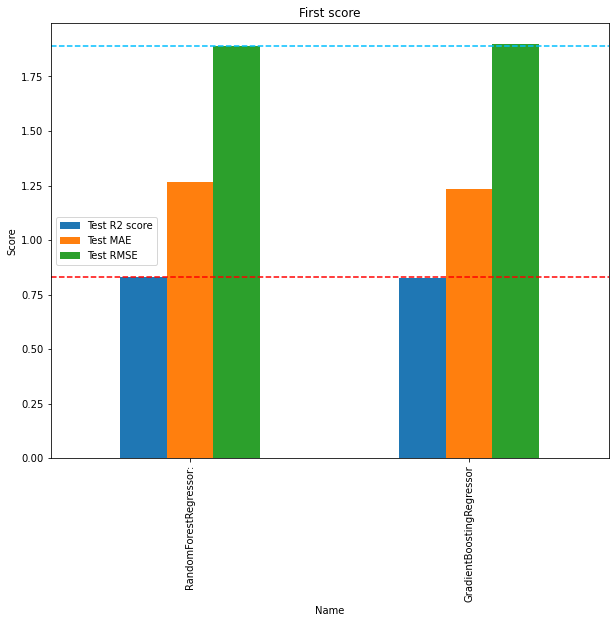

In [171]:
fig, ax = plt.subplots(figsize= (10,8))
df_last_score.plot.bar(x='Name', y=['Test R2 score', 'Test MAE', 'Test RMSE'], ax=ax)
ax.set(title='First score', ylabel='Score')
ax.axhline(df_last_score['Test R2 score'].max(), linestyle='--', c='red')
ax.axhline(df_last_score['Test RMSE'].min(), linestyle='--', c='deepskyblue');

In [9]:
rfr_model_final = RandomForestRegressor(max_depth = 10,
                                        max_features = 0.5,
                                        min_samples_leaf = 1,
                                        min_samples_split = 6,
                                        n_estimators = 90,
                                        random_state=5)
rfr_model_final.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_split=6,
                      n_estimators=90, random_state=5)

In [10]:
gbr_model_final = GradientBoostingRegressor(max_features = 'auto',
                                            min_samples_leaf = 15,
                                            min_samples_split = 2,
                                            n_estimators = 40,
                                            random_state=5)
gbr_model_final.fit(x_train, y_train)

GradientBoostingRegressor(max_features='auto', min_samples_leaf=15,
                          n_estimators=40, random_state=5)

In [177]:
rfr_model_final.feature_importances_

array([1.52610270e-03, 9.55430712e-04, 1.41517649e-02, 5.50641124e-04,
       1.52436765e-03, 1.52522637e-03, 7.70854484e-03, 3.21419250e-03,
       6.14709220e-03, 4.05718902e-03, 5.01599112e-03, 1.54425861e-03,
       1.96531803e-03, 6.64006149e-03, 3.05258136e-02, 3.92917331e-03,
       1.04033485e-03, 1.57265283e-03, 1.72850682e-03, 1.45443758e-03,
       1.66829356e-03, 1.97890688e-03, 3.42952566e-03, 4.67971053e-03,
       3.50329910e-03, 4.18838929e-03, 2.88121093e-03, 6.42234985e-03,
       6.64872385e-03, 9.76391066e-02, 2.10618576e-01, 5.59564808e-01])

In [181]:
x.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [183]:
feature_importance = pd.DataFrame({'Features_importance':rfr_model_final.feature_importances_,
                                   'Features':x.columns})
feature_importance

,Features_importance,Features
0,0.001526,school
1,0.000955,sex
2,0.014152,age
3,0.000551,address
4,0.001524,famsize
5,0.001525,Pstatus
6,0.007709,Medu
7,0.003214,Fedu
8,0.006147,Mjob
9,0.004057,Fjob


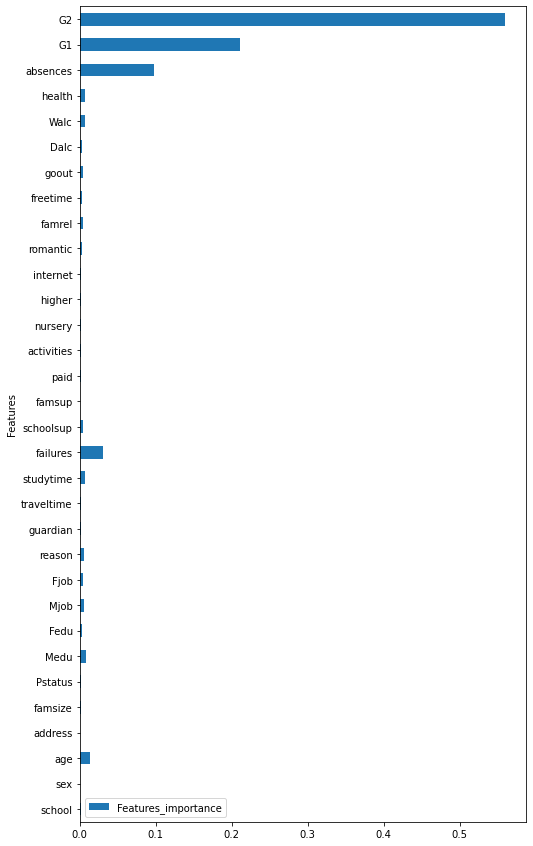

In [190]:
feature_importance.plot.barh(x='Features', y='Features_importance', figsize=(8,15));

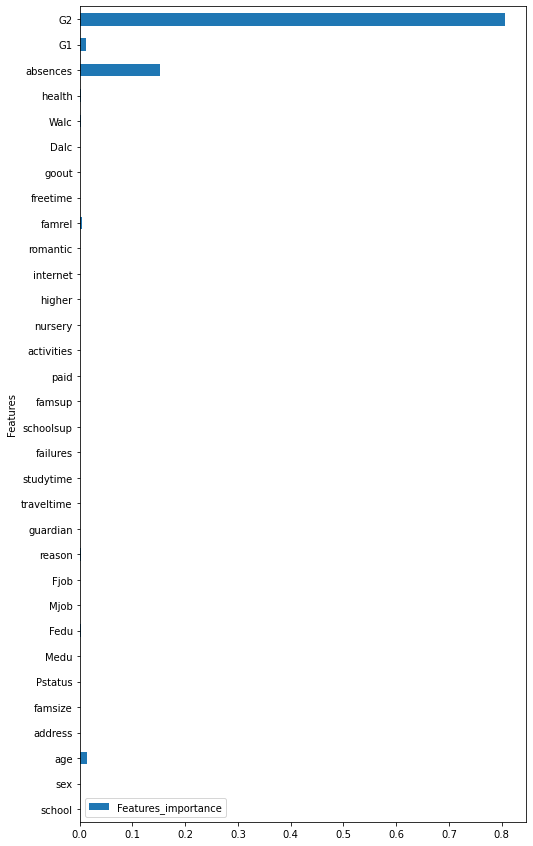

In [11]:
feature_importance2 = pd.DataFrame({'Features_importance':gbr_model_final.feature_importances_,
                                   'Features':x.columns})

feature_importance2.plot.barh(x='Features', y='Features_importance', figsize=(8,15));

In [12]:
y_pred_rfr = rfr_model_final.predict(x_test)
y_pred_gbr = gbr_model_final.predict(x_test)

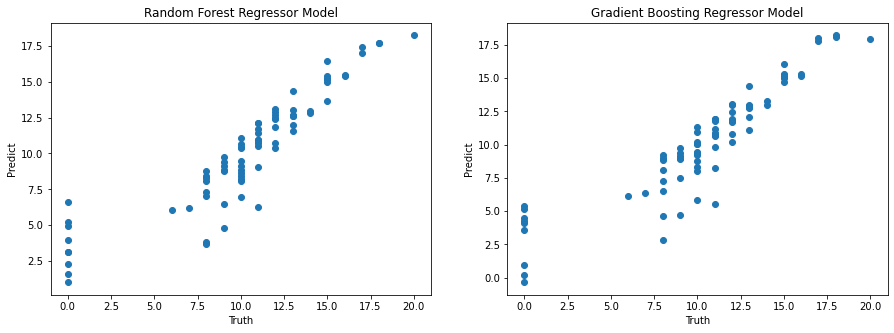

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.scatter(y_test, y_pred_rfr)
ax1.set(title='Random Forest Regressor Model', xlabel='Truth', ylabel='Predict')
ax2.scatter(y_test, y_pred_gbr)
ax2.set(title='Gradient Boosting Regressor Model', xlabel='Truth', ylabel='Predict');

**Save the finals models**

In [20]:
from joblib import dump, load

In [22]:
dump(rfr_model_final, filename='.\Models\RandomForestRegressor.joblib')
dump(gbr_model_final, filename='.\Models\GradientBoostingRegressor.joblib')

['.\\Models\\GradientBoostingRegressor.joblib']

# 6.Experiments

* We could try more hyperparameters evaluations
* Improve the other models
* Collect more data
* Try another estimator for the data like XGBoost

# Conclusions

**We didn't hit the 85% proposed above, but we hit at least the 82% with an error margin of +- 1.5. In the other hand, the collected data are not very relevant to predict the final grade.**

***I recommend follow the hints in the evaluations step, for hit a more accuracy metric.***